In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_frame = pd.read_csv('OnlineRetail.csv', encoding = 'latin1')

In [3]:
#data_frame.head() --> dafult shows 5 rows of data_frame
#data_frame.head(n) --> shows n rows of data_frame
data_frame.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:

data_frame['InvoiceDate'] = pd.to_datetime(data_frame['InvoiceDate'])
data_frame['InvoiceYearMonth'] = data_frame['InvoiceDate'].map(lambda date : 100 * date.year + date.month)
data_frame['Revenue'] = data_frame['UnitPrice'] * data_frame['Quantity']
data_frame.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [5]:
data_revenue = data_frame.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
data_revenue.head()

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121


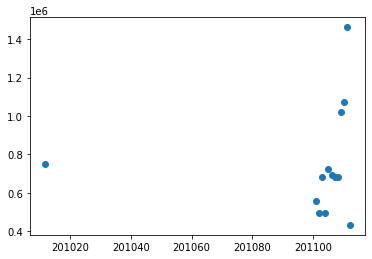

In [6]:
plt.scatter(data_revenue['InvoiceYearMonth'], data_revenue['Revenue'])

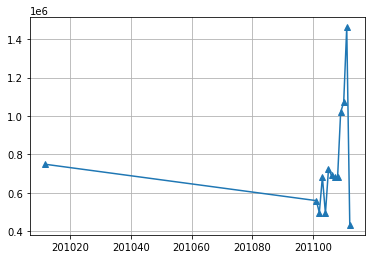

In [7]:
plt.plot(data_revenue['InvoiceYearMonth'], data_revenue['Revenue'], marker = '^')
plt.grid()


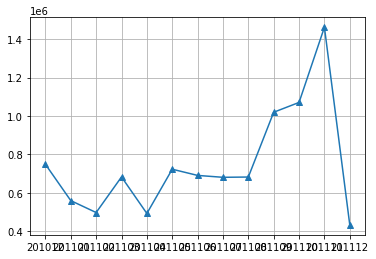

In [8]:
plt.plot(data_revenue['InvoiceYearMonth'].to_numpy(dtype = str), data_revenue['Revenue'], marker = '^')
plt.grid()

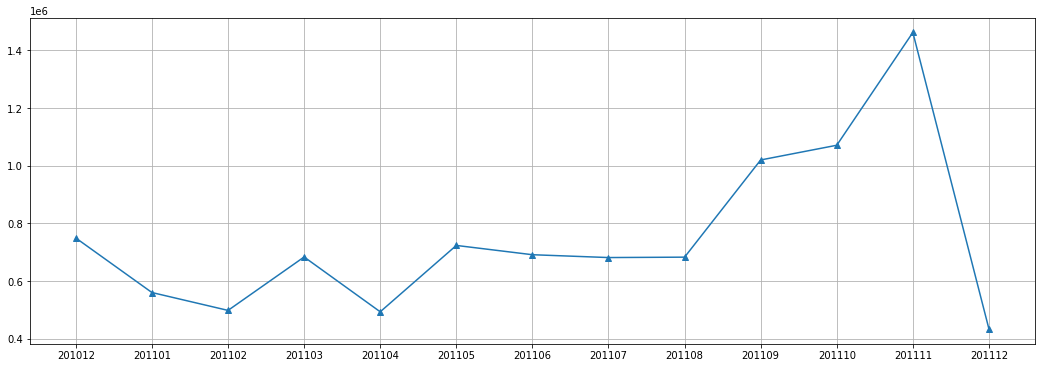

In [9]:
plt.figure(figsize = (18, 6))
# plt.plot(data_revenue.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'].to_numpy(dtype = str),data_revenue.query("InvoiceYearMonth < 201112")['MonthlyGrowth'], marker = '^')

plt.plot(data_revenue['InvoiceYearMonth'].to_numpy(dtype = str), data_revenue['Revenue'], marker = '^')
plt.grid()

## Monthly Revenue Growth Rate

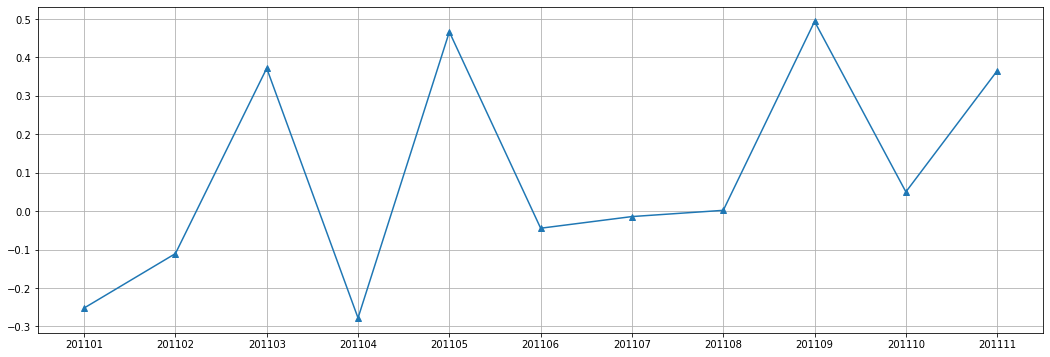

In [10]:
data_revenue['MonthlyGrowth'] = data_revenue['Revenue'].pct_change()

plt.figure(figsize = (18, 6))
plt.plot(data_revenue.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'].to_numpy(dtype = str),data_revenue.query("InvoiceYearMonth < 201112")['MonthlyGrowth'], marker = '^')
plt.grid()

## Monthly Active Customers

focusing on UK data only (which has the most records)


In [11]:
data_uk = data_frame.query("Country=='United Kingdom'").reset_index(drop=True)

#creating monthly active customers dataframe by counting unique Customer IDs
data_monthly_active = data_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

#print the dataframe
data_monthly_active.head(10)

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


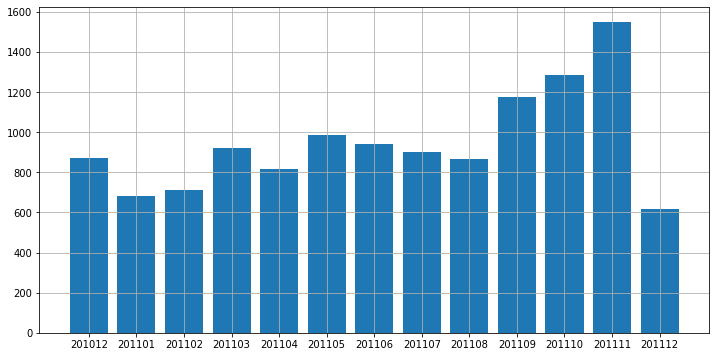

In [12]:
plt.figure(figsize = (12, 6))
plt.bar(data_monthly_active['InvoiceYearMonth'].to_numpy(dtype = str), data_monthly_active['CustomerID'])#.to_numpy(dtype = str))
plt.grid()

## Monthly Order Count


In [13]:
data_monthly_sales = data_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
data_monthly_sales.head()

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666


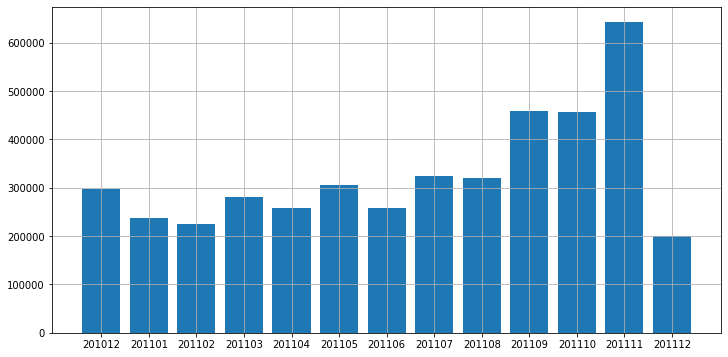

In [14]:
plt.figure(figsize = (12, 6))
plt.bar(data_monthly_sales['InvoiceYearMonth'].to_numpy(dtype = str), data_monthly_sales['Quantity'])#.to_numpy(dtype = str))
plt.grid()

## New Customer Ratio


In [28]:
tx_min_purchase = data_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

data_uk = pd.merge(data_uk, tx_min_purchase, on='CustomerID')

# data_uk.head()

data_uk['UserType'] = 'New'
data_uk.loc[data_uk['InvoiceYearMonth']>data_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'

tx_user_type_revenue = data_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

tx_user_type_revenue = tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")

c:\users\eniac\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'MinPurchaseDate_x'} in the result is deprecated and will raise a MergeError in a future version.
  """


In [34]:
tx_monthly_order_avg = data_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()
tx_monthly_order_avg.head()



,InvoiceYearMonth,Revenue
0,201012,19.717955
1,201101,18.784357
2,201102,19.263039
3,201103,18.583718
4,201104,17.639499


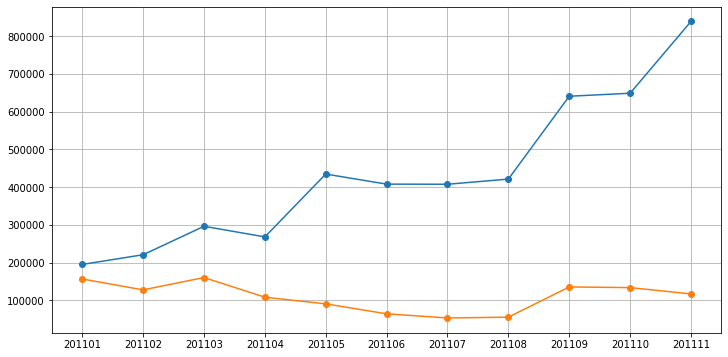

In [35]:
plt.figure(figsize=(12,6))
plt.plot(tx_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'].to_numpy(dtype='str'), tx_user_type_revenue.query("UserType == 'Existing'")['Revenue'], marker='o')
plt.plot(tx_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'].to_numpy(dtype='str'), tx_user_type_revenue.query("UserType == 'New'")['Revenue'], marker='o')
plt.grid()

In [38]:
tx_user_ratio = data_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/data_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()
tx_user_ratio.head()

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793


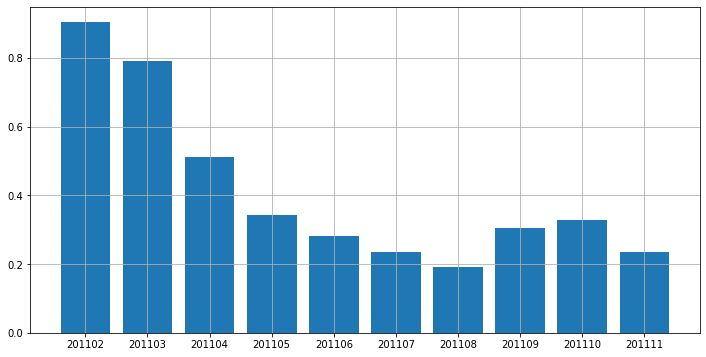

In [36]:
plt.figure(figsize=(12,6))
plt.bar(tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype='str'), tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['CustomerID'])
plt.grid()

In [40]:
tx_user_purchase = data_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()
tx_retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [41]:
months = tx_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']

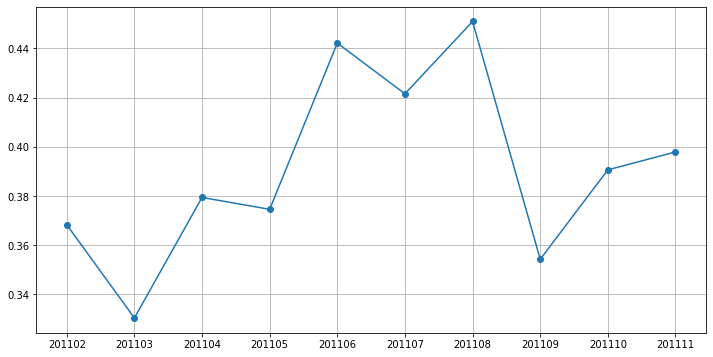

In [42]:
plt.figure(figsize=(12,6))
plt.plot(tx_retention.query("InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype='str'), tx_retention.query("InvoiceYearMonth<201112")['RetentionRate'], marker='o')
plt.grid()